<center><h1>Continuous Variables and <i>T</i>-Tests</h1></center> 

# 1. Introduction
To this point, we have been looking at categorical data (e.g., "heads"/"tails", yes/no, cat dances/cat doesn't dance). We will now explore some interesting new methods; in particular, we can start looking at continuous variables. 

# 2. Student's _T_-Test


- The t-test refers to a family of statistical tests whose test statistic follows the t-distribution. 
- First published by William Gossett under pseudonym "Student"

<center><img src="images/gossett.jpg" width=180/></center>



## 2.1 _T_-Distribution

- The t-distribution is a continuous probability distribution
- Has 1 parameter 
  + $\nu$: degrees of freedom
- Similar to normal distribution
  + Symmetric and bell-shaped
  
<center><img src="images/t_dist.png" width=270/></center>


### 2.1.1 Student's _T_-Test (cont.)

We will discuss three types of _t_-tests
  - One-sample _t_-test
  - Independent (two-sample) _t_-test
  - Dependent samples _t_-test
    + Also known as "paired-samples" _t_-test


## 2.2 Notes on _t_-tests in R
  - All three versions of the _t_-test are implemented in R as the `t.test()`function
  - Specifying different arguments to the function will give you different type of _t_-test
  - In all three cases, the _t_-test can be done as one-sided or two sided. We will generally prefer two-sided tests

# 3. One-Sample _t_-test
The one-sample _t_-test is used to test the null hypothesis that the population mean is equal to some value $\mu_0$. The test statistics is defined as $$t = \frac{\overline{x} - \mu_0}{\sigma_{\overline{x}}},$$
where $\overline{x}$ is the sample mean and $\sigma_{\overline{x}}$ is our estimate of the standard error of the mean. Recall it is defined as $$\sigma_{\overline{x}} = {s \over \sqrt{n}},$$
where $s$ is the sample standard deviation and $n$ is the sample size.


## 3.1 One-Sample _t_-test (cont.)
So, our test statistics is defined as $$t = \frac{\overline{x} - \mu_0}{s / \sqrt{n}}.$$ We also need to know the degrees of freedoms ($\nu$) so we can compare our $t$ to the appropriate _t_-distribution. 

In the one-sample case, $\nu = n - 1$, where $n$ is our sample size. 

### 3.1.1 One-Sample _t_-test Example 

Suppose you teach high school math and you would like to know whether your students perform at, above, or below average on the math portion of the SAT.

In [1]:
# Define vector of student's SAT scores
sat <- c(527, 554, 534, 541, 539, 542, 498, 512, 
         528, 531, 563, 566, 498, 503, 551, 582, 
         529, 549, 571, 523, 543, 588, 571)

# our sample mean
mean(sat)

[1] 541

### 3.1.2 One-Sample _t_-test Example (cont.) 

In [3]:
t.test(sat, mu = 527)


	One Sample t-test

data:  sat
t = 2.6516, df = 22, p-value = 0.01458
alternative hypothesis: true mean is not equal to 527
95 percent confidence interval:
 530.0501 551.9499
sample estimates:
mean of x 
      541 




## 3.2 One-Sample _t_-test  Assumptions
Assumptions of one-sample _t_-test:

  - Observations are independent 
  - Variable is normally distributed in population
    + In practice, _t_-test is fairly robust to violations of normality provided $n$ is not small.



# 4. Independent (Two-Sample) _t_-test
The independent _t_-test:

  - More common version of the _t_-test
  - Used to compare means from two different groups
  - Test statistic is:
    $$t = \frac{\overline{x}_1 - \overline{x}_2}{\sqrt{{s_{1}^{2} \over n_1} + {s_{2}^{2} \over n_2}}},$$
    where $s_{k}^{2}$ is variance of Group $k$, and $n_k$ is sample size.

  - Our degrees of freedom are: $\nu = n_1 + n_2 - 2$



## 4.1 Two-Sample _t_-test Example

  - `spider` data from Andy Field's _Discovering Statistics with R_
  - Treating arachnophobia
  - Two treatment groups (12 subjects per group):
      + real spider
      + picture of spider
  - Measure anxiety after exposure to spider or picture

In [4]:
library(ggplot2)

spider <- read.csv("data/spiderlong.csv")

### 4.1.1 Examine Data

In [5]:
head(spider)
tail(spider)

,group,anxiety
,<chr>,<int>
1,picture,30
2,picture,35
3,picture,45
4,picture,40
5,picture,50
6,picture,35


,group,anxiety
,<chr>,<int>
19,realspider,50
20,realspider,35
21,realspider,30
22,realspider,50
23,realspider,60
24,realspider,39


### 4.1.2 Examine Data (cont.)

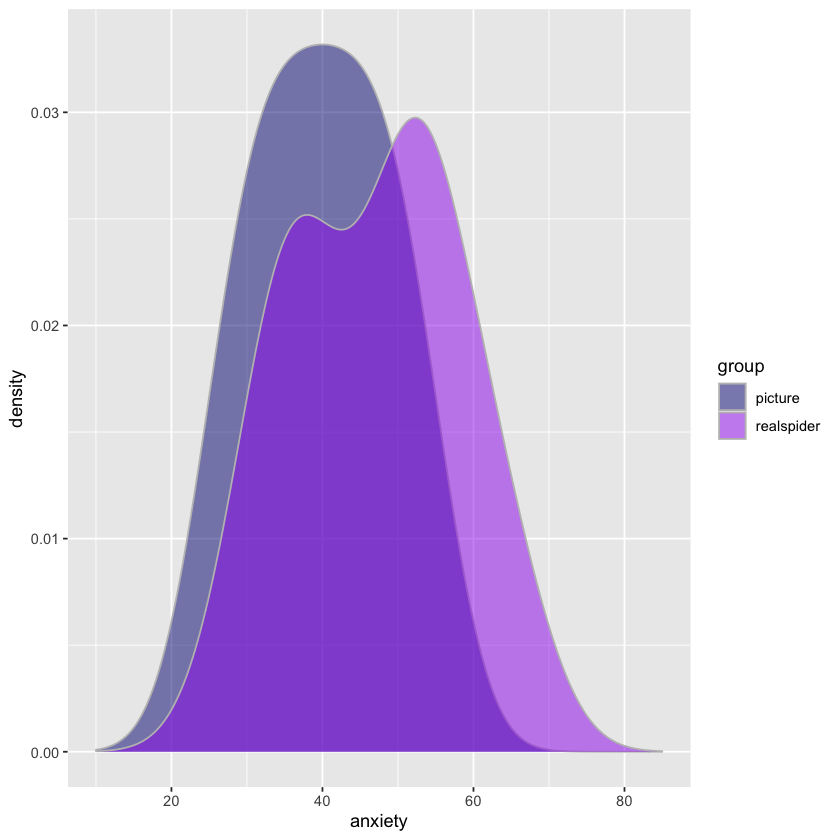

In [6]:
ggplot(spider, aes(x = anxiety, fill = group)) +
    geom_density(alpha = 0.5, colour = "grey") +
    xlim(10, 85) +
    scale_fill_manual(values = c("navy", "purple"))

### 4.1.3 Examine Data (cont.)

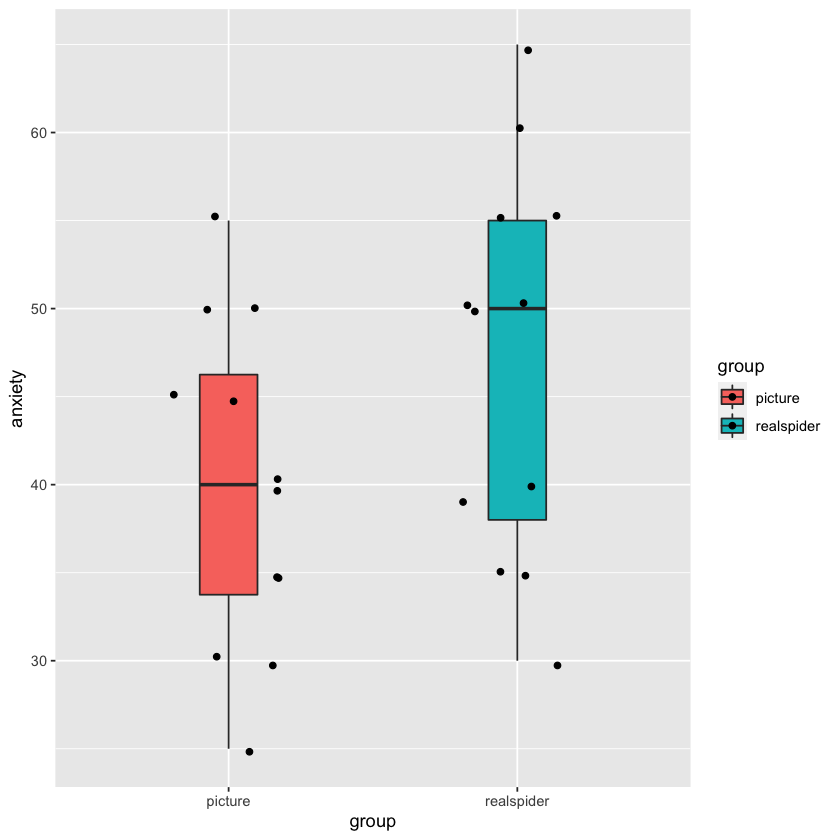

In [7]:
ggplot(spider, aes(y = anxiety, x = group, fill = group)) +
    geom_boxplot(width = 0.2) + 
    geom_jitter(width = 0.2)

## 4.2 Two-Sample _t_-test

In [9]:
t.test(anxiety ~ group, data = spider)


	Welch Two Sample t-test

data:  anxiety by group
t = -1.6813, df = 21.385, p-value = 0.1072
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.648641   1.648641
sample estimates:
   mean in group picture mean in group realspider 
                      40                       47 


## 4.3 Independent (two-sample) _t_-test (cont.)
Assumptions of independent (two-sample) _t_-test:

  - Observations are independent 
  - Variable is normally distributed in population
    + In practice, _t_-test is fairly robust to violations of normality provided $n$ is not small.

  - Homogeneity of variance

  - Assume equal variances in two populations 
    + The _t_-test is also quite robust to violations of homogeneity of variance


# 5. Dependent (paired-sample) _t_-test

The paired _t_-test is often used when we have repeated measurements (i.e., one sample with two measurement occasions). The test statistics is defined as $$t = \frac{\overline{x}_D - \mu_0}{{s_D \over \sqrt{n}}},$$

## 5.1 Paired-Sample _t_-test Example

  - Developed some new medication to lower cholesterol
  - Randomly assign 50 patients each to a treatment and control group
  - Two time poits:
    + Time1: baseline measurement at beginning of study
    + Time2: after 6 months
  - Measure their total cholesterol
  - Research questions:

<center><i>Is the treatment group's mean total cholesterol different than the control group's?</i></center>

### 5.1.1 Paired-Sample _t_-test Example (cont.)

In [11]:
drug_trial <- read.csv("data/drug_trial_data.csv")

head(drug_trial)

tail(drug_trial)

,id,group,sex,age,time1,time2
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,treatment,female,56,205.4520,165.3710
2,2,treatment,female,52,174.1915,139.9874
3,3,treatment,female,57,183.5428,155.5088
4,4,treatment,female,64,244.7448,206.9940
5,5,treatment,female,58,165.8870,123.5784
6,6,treatment,male,73,237.1581,195.4426


,id,group,sex,age,time1,time2
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
95,95,control,male,55,166.9758,164.4422
96,96,control,male,35,139.7793,147.2987
97,97,control,female,45,190.4791,190.2667
98,98,control,female,45,213.0188,215.2051
99,99,control,female,55,212.6150,213.2956
100,100,control,female,48,229.5916,227.0275


### 5.1.2 Paired-Sample _t_-test Example (cont.)

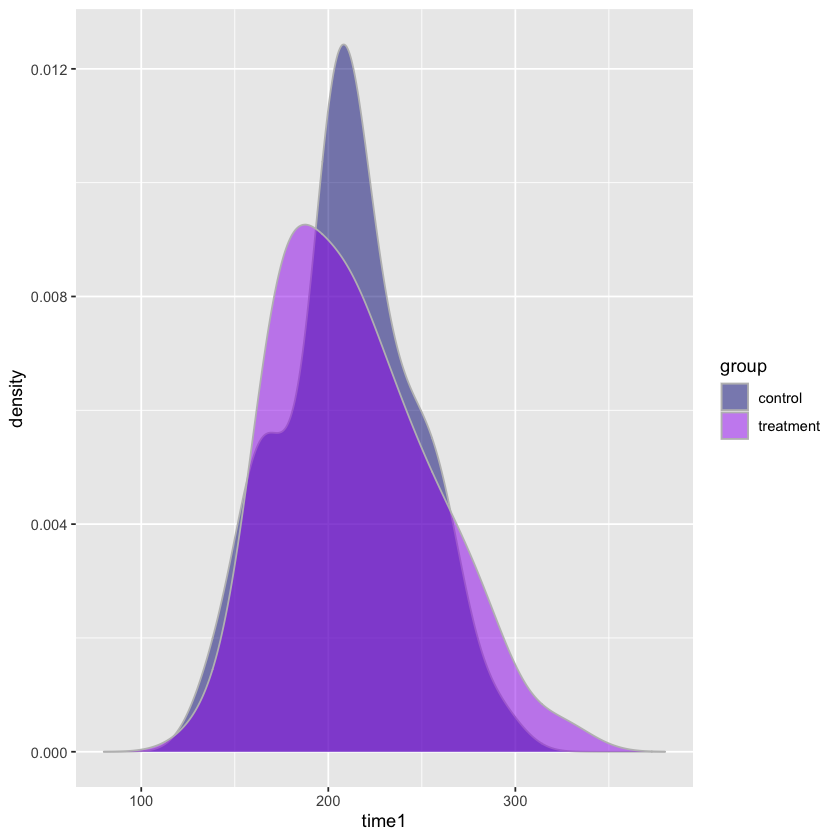

In [13]:
ggplot(drug_trial, aes(x = time1, fill = group)) +
    geom_density(alpha = 0.5, colour = "grey") +
    xlim(80, 380) + 
    scale_fill_manual(values = c("navy", "purple"))

### 5.1.3 Paired-Sample _t_-test Example (cont.)

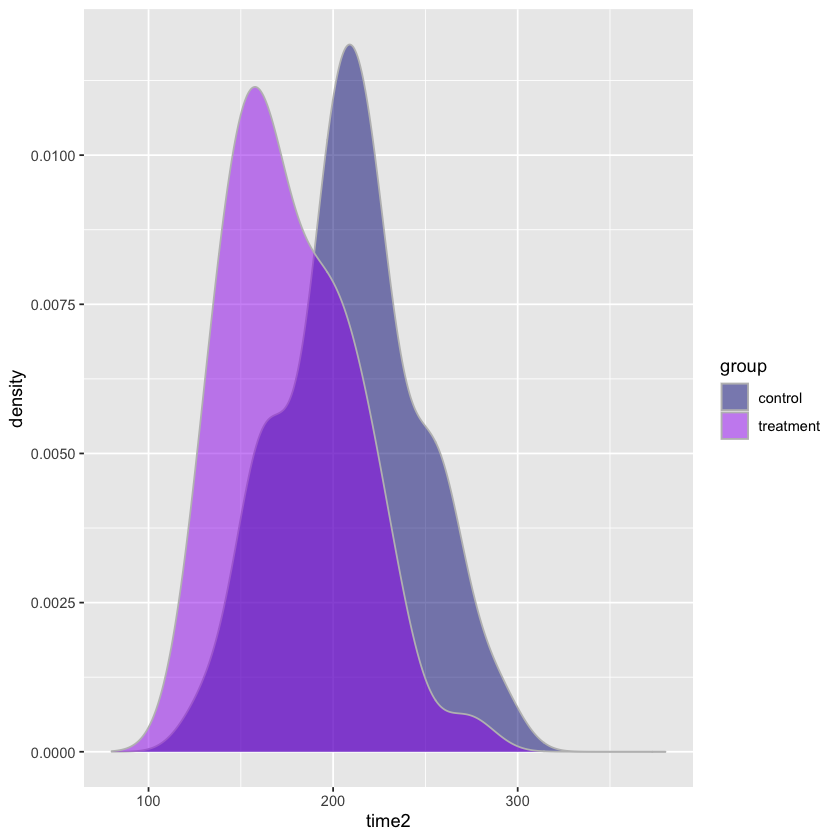

In [14]:
ggplot(drug_trial, aes(x = time2, fill = group)) +
    geom_density(alpha = 0.5, colour = "grey") +
    xlim(80, 380) + 
    scale_fill_manual(values = c("navy", "purple"))

### 5.1.4 Paired-Sample _t_-test (cont.)

Running paired-sample _t_-test using the `t.test()` function

In [15]:
t.test(drug_trial$time1, drug_trial$time2, paired = TRUE)


	Paired t-test

data:  drug_trial$time1 and drug_trial$time2
t = 9.3923, df = 99, p-value = 2.316e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 14.86217 22.82368
sample estimates:
mean of the differences 
               18.84293 
